In [7]:
import requests
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
username = 'hikaru'

In [4]:
base_url = 'https://api.chess.com/pub/player/'
profile_url = fr'{base_url}{username}'
print(profile_url)


https://api.chess.com/pub/player/hikaru


In [8]:
response = requests.get(profile_url, headers=headers)

In [9]:
response

<Response [200]>

In [10]:
dir(response)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [11]:
response.json()

{'avatar': 'https://images.chesscomfiles.com/uploads/v1/user/15448422.88c010c1.200x200o.3c5619f5441e.png',
 'player_id': 15448422,
 '@id': 'https://api.chess.com/pub/player/hikaru',
 'url': 'https://www.chess.com/member/Hikaru',
 'name': 'Hikaru Nakamura',
 'username': 'hikaru',
 'title': 'GM',
 'followers': 1226750,
 'country': 'https://api.chess.com/pub/country/US',
 'location': 'Florida',
 'last_online': 1732574738,
 'joined': 1389043258,
 'status': 'premium',
 'is_streamer': True,
 'twitch_url': 'https://twitch.tv/gmhikaru',
 'verified': False,
 'league': 'Legend',
 'streaming_platforms': [{'type': 'twitch',
   'channel_url': 'https://twitch.tv/gmhikaru'}]}

In [12]:
# let's analyze some games

# pattern :https://api.chess.com/pub/player/{username}/games/{YYYY}/{MM} 

MM = 11
YYYY = 2024

target_url = fr'https://api.chess.com/pub/player/{username}/games/{YYYY}/{MM}'
print(target_url)

https://api.chess.com/pub/player/hikaru/games/2024/11


In [13]:
response = requests.get(target_url, headers=headers)

In [15]:
response.json().keys()

dict_keys(['games'])

In [16]:
# let's put this in a dataframe
import pandas as pd
df = pd.DataFrame(response.json()['games'])

In [18]:
df.head(2)

,url,pgn,time_control,end_time,rated,tcn,uuid,initial_setup,fen,start_time,time_class,rules,white,black,eco,accuracies
0,https://www.chess.com/game/daily/175903249,"[Event ""Play vs Bot""]\n[Site ""Chess.com""]\n[Da...",1/0,1730501016,False,mC0Kgv5QlBKBvB!Tbs9zBQXQdm8!CK98cuzsjs8KowTJfo...,bb592aee-98a2-11ef-b248-1724ad6b12c6,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w ...,8/8/2p5/8/8/2k5/8/r1K4b w - - 28 67,1.730499e+09,daily,chess,"{'rating': 2725, 'result': 'checkmated', '@id'...","{'rating': 2769, 'result': 'win', '@id': 'http...",https://www.chess.com/openings/Four-Knights-Ga...,NaN
1,https://www.chess.com/game/live/124302530065,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",60,1730563543,True,jr0KcjZRmu5Qgv!TlBKBvB90fm8!eg6ZkA98mv09bs45BQ...,067a6bf4-9934-11ef-9df8-6cfe544c0428,,8/5pbk/3p1p2/2p2P1P/2P1q1K1/6P1/8/7q w - -,NaN,bullet,chess,"{'rating': 3248, 'result': 'checkmated', '@id'...","{'rating': 2565, 'result': 'win', '@id': 'http...",https://www.chess.com/openings/Nimzowitsch-Lar...,"{'white': 78.48, 'black': 83.29}"


In [19]:
df.shape

(700, 16)

In [23]:
print(df.iloc[0,:].pgn)

[Event "Play vs Bot"]
[Site "Chess.com"]
[Date "2024.11.01"]
[Round "-"]
[White "capablanca-BOT"]
[Black "Hikaru"]
[Result "0-1"]
[CurrentPosition "8/8/2p5/8/8/2k5/8/r1K4b w - - 28 67"]
[Timezone "UTC"]
[ECO "C47"]
[ECOUrl "https://www.chess.com/openings/Four-Knights-Game-Scotch-Variation-Accepted-5.Nxd4-Bb4-6.Nxc6-bxc6"]
[UTCDate "2024.11.01"]
[UTCTime "22:08:04"]
[WhiteElo "2725"]
[BlackElo "2769"]
[TimeControl "1/0"]
[Termination "Hikaru won by checkmate"]
[StartTime "22:08:04"]
[EndDate "2024.11.01"]
[EndTime "22:43:36"]
[Link "https://www.chess.com/game/computer/175903249"]

1. e4 e5 2. Nf3 Nc6 3. d4 exd4 4. Nxd4 Nf6 5. Nc3 Bb4 6. Nxc6 bxc6 7. Qe2 O-O 8. e5 Re8 9. Be3 Bxc3+ 10. bxc3 Rxe5 11. g3 Nd5 12. Bg2 Nxe3 13. fxe3 a5 14. O-O Ba6 15. c4 Qe7 16. Rfe1 d5 17. Rab1 Bxc4 18. Qd2 a4 19. Rb4 Bb5 20. Qc3 Re8 21. e4 f5 22. Bf1 dxe4 23. Reb1 Qc5+ 24. Qxc5 Rxc5 25. c4 Ba6 26. Rxa4 Bc8 27. Rb8 Bd7 28. Rxe8+ Bxe8 29. Ra7 g5 30. a4 Bf7 31. Rxc7 Bxc4 32. Kf2 e3+ 33. Ke1 Bd5 34. Kd1 f4 35. g

In [26]:
print(df.iloc[0,:].white)
print(df.iloc[0,:].black)


{'rating': 2725, 'result': 'checkmated', '@id': 'https://api.chess.com/pub/player/capablanca-bot', 'username': 'capablanca-BOT', 'uuid': '3d086f74-8bdc-11ef-bdc5-49c48571a85c'}
{'rating': 2769, 'result': 'win', '@id': 'https://api.chess.com/pub/player/hikaru', 'username': 'Hikaru', 'uuid': '6f4deb88-7718-11e3-8016-000000000000'}


In [31]:
df.iloc[0,:].white['username']

'capablanca-BOT'

In [35]:
# interested in 
# what color pieces the player had
# wins 
df['white_user'] = df['white'].apply(lambda row: row['username'])
df['black_user'] = df['black'].apply(lambda row: row['username'])


In [36]:
df.head(2)

,url,pgn,time_control,end_time,rated,tcn,uuid,initial_setup,fen,start_time,time_class,rules,white,black,eco,accuracies,white_user,black_user
0,https://www.chess.com/game/daily/175903249,"[Event ""Play vs Bot""]\n[Site ""Chess.com""]\n[Da...",1/0,1730501016,False,mC0Kgv5QlBKBvB!Tbs9zBQXQdm8!CK98cuzsjs8KowTJfo...,bb592aee-98a2-11ef-b248-1724ad6b12c6,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w ...,8/8/2p5/8/8/2k5/8/r1K4b w - - 28 67,1.730499e+09,daily,chess,"{'rating': 2725, 'result': 'checkmated', '@id'...","{'rating': 2769, 'result': 'win', '@id': 'http...",https://www.chess.com/openings/Four-Knights-Ga...,NaN,capablanca-BOT,Hikaru
1,https://www.chess.com/game/live/124302530065,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",60,1730563543,True,jr0KcjZRmu5Qgv!TlBKBvB90fm8!eg6ZkA98mv09bs45BQ...,067a6bf4-9934-11ef-9df8-6cfe544c0428,,8/5pbk/3p1p2/2p2P1P/2P1q1K1/6P1/8/7q w - -,NaN,bullet,chess,"{'rating': 3248, 'result': 'checkmated', '@id'...","{'rating': 2565, 'result': 'win', '@id': 'http...",https://www.chess.com/openings/Nimzowitsch-Lar...,"{'white': 78.48, 'black': 83.29}",Hikaru,meoluoi91


In [37]:
def color(row):
    if row.white_user.casefold() == username.casefold():
        return 'white'
    else:
        return 'black'

In [38]:
df['color'] = df.apply(color, axis=1)

In [39]:
df.head(2)

,url,pgn,time_control,end_time,rated,tcn,uuid,initial_setup,fen,start_time,time_class,rules,white,black,eco,accuracies,white_user,black_user,color
0,https://www.chess.com/game/daily/175903249,"[Event ""Play vs Bot""]\n[Site ""Chess.com""]\n[Da...",1/0,1730501016,False,mC0Kgv5QlBKBvB!Tbs9zBQXQdm8!CK98cuzsjs8KowTJfo...,bb592aee-98a2-11ef-b248-1724ad6b12c6,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w ...,8/8/2p5/8/8/2k5/8/r1K4b w - - 28 67,1.730499e+09,daily,chess,"{'rating': 2725, 'result': 'checkmated', '@id'...","{'rating': 2769, 'result': 'win', '@id': 'http...",https://www.chess.com/openings/Four-Knights-Ga...,NaN,capablanca-BOT,Hikaru,black
1,https://www.chess.com/game/live/124302530065,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",60,1730563543,True,jr0KcjZRmu5Qgv!TlBKBvB90fm8!eg6ZkA98mv09bs45BQ...,067a6bf4-9934-11ef-9df8-6cfe544c0428,,8/5pbk/3p1p2/2p2P1P/2P1q1K1/6P1/8/7q w - -,NaN,bullet,chess,"{'rating': 3248, 'result': 'checkmated', '@id'...","{'rating': 2565, 'result': 'win', '@id': 'http...",https://www.chess.com/openings/Nimzowitsch-Lar...,"{'white': 78.48, 'black': 83.29}",Hikaru,meoluoi91,white


In [45]:
print(df.iloc[0,:].pgn)

[Event "Play vs Bot"]
[Site "Chess.com"]
[Date "2024.11.01"]
[Round "-"]
[White "capablanca-BOT"]
[Black "Hikaru"]
[Result "0-1"]
[CurrentPosition "8/8/2p5/8/8/2k5/8/r1K4b w - - 28 67"]
[Timezone "UTC"]
[ECO "C47"]
[ECOUrl "https://www.chess.com/openings/Four-Knights-Game-Scotch-Variation-Accepted-5.Nxd4-Bb4-6.Nxc6-bxc6"]
[UTCDate "2024.11.01"]
[UTCTime "22:08:04"]
[WhiteElo "2725"]
[BlackElo "2769"]
[TimeControl "1/0"]
[Termination "Hikaru won by checkmate"]
[StartTime "22:08:04"]
[EndDate "2024.11.01"]
[EndTime "22:43:36"]
[Link "https://www.chess.com/game/computer/175903249"]

1. e4 e5 2. Nf3 Nc6 3. d4 exd4 4. Nxd4 Nf6 5. Nc3 Bb4 6. Nxc6 bxc6 7. Qe2 O-O 8. e5 Re8 9. Be3 Bxc3+ 10. bxc3 Rxe5 11. g3 Nd5 12. Bg2 Nxe3 13. fxe3 a5 14. O-O Ba6 15. c4 Qe7 16. Rfe1 d5 17. Rab1 Bxc4 18. Qd2 a4 19. Rb4 Bb5 20. Qc3 Re8 21. e4 f5 22. Bf1 dxe4 23. Reb1 Qc5+ 24. Qxc5 Rxc5 25. c4 Ba6 26. Rxa4 Bc8 27. Rb8 Bd7 28. Rxe8+ Bxe8 29. Ra7 g5 30. a4 Bf7 31. Rxc7 Bxc4 32. Kf2 e3+ 33. Ke1 Bd5 34. Kd1 f4 35. g

In [47]:
import re
re.findall(r'\[Result "(0-1)"\]',df.iloc[0,:].pgn)

['0-1']

In [51]:
# new column for result

df['raw_result'] = df.pgn.str.extract(r'\[Result "(.*)"\]')

In [52]:
df.head(2)

,url,pgn,time_control,end_time,rated,tcn,uuid,initial_setup,fen,start_time,time_class,rules,white,black,eco,accuracies,white_user,black_user,color,raw_result
0,https://www.chess.com/game/daily/175903249,"[Event ""Play vs Bot""]\n[Site ""Chess.com""]\n[Da...",1/0,1730501016,False,mC0Kgv5QlBKBvB!Tbs9zBQXQdm8!CK98cuzsjs8KowTJfo...,bb592aee-98a2-11ef-b248-1724ad6b12c6,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w ...,8/8/2p5/8/8/2k5/8/r1K4b w - - 28 67,1.730499e+09,daily,chess,"{'rating': 2725, 'result': 'checkmated', '@id'...","{'rating': 2769, 'result': 'win', '@id': 'http...",https://www.chess.com/openings/Four-Knights-Ga...,NaN,capablanca-BOT,Hikaru,black,0-1
1,https://www.chess.com/game/live/124302530065,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",60,1730563543,True,jr0KcjZRmu5Qgv!TlBKBvB90fm8!eg6ZkA98mv09bs45BQ...,067a6bf4-9934-11ef-9df8-6cfe544c0428,,8/5pbk/3p1p2/2p2P1P/2P1q1K1/6P1/8/7q w - -,NaN,bullet,chess,"{'rating': 3248, 'result': 'checkmated', '@id'...","{'rating': 2565, 'result': 'win', '@id': 'http...",https://www.chess.com/openings/Nimzowitsch-Lar...,"{'white': 78.48, 'black': 83.29}",Hikaru,meoluoi91,white,0-1


In [53]:
df.raw_result.unique()

array(['0-1', '1-0', '1/2-1/2'], dtype=object)

In [ ]:
def get_result(row):
    if row.raw_result == '1/2-1/2':
        return 'draw'  
    elif (row.raw_result=='1-0' and row.color=='white') or (row.raw_result == '0-1' and row.color == 'black'):
        return 'win'
    else:
        return 'loss'

In [ ]:
df['result'] = df.apply()

AttributeError: 'Series' object has no attribute 'raw_result'

In [55]:
df.head(2)

,url,pgn,time_control,end_time,rated,tcn,uuid,initial_setup,fen,start_time,...,rules,white,black,eco,accuracies,white_user,black_user,color,raw_result,result
0,https://www.chess.com/game/daily/175903249,"[Event ""Play vs Bot""]\n[Site ""Chess.com""]\n[Da...",1/0,1730501016,False,mC0Kgv5QlBKBvB!Tbs9zBQXQdm8!CK98cuzsjs8KowTJfo...,bb592aee-98a2-11ef-b248-1724ad6b12c6,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w ...,8/8/2p5/8/8/2k5/8/r1K4b w - - 28 67,1.730499e+09,...,chess,"{'rating': 2725, 'result': 'checkmated', '@id'...","{'rating': 2769, 'result': 'win', '@id': 'http...",https://www.chess.com/openings/Four-Knights-Ga...,NaN,capablanca-BOT,Hikaru,black,0-1,loss
1,https://www.chess.com/game/live/124302530065,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",60,1730563543,True,jr0KcjZRmu5Qgv!TlBKBvB90fm8!eg6ZkA98mv09bs45BQ...,067a6bf4-9934-11ef-9df8-6cfe544c0428,,8/5pbk/3p1p2/2p2P1P/2P1q1K1/6P1/8/7q w - -,NaN,...,chess,"{'rating': 3248, 'result': 'checkmated', '@id'...","{'rating': 2565, 'result': 'win', '@id': 'http...",https://www.chess.com/openings/Nimzowitsch-Lar...,"{'white': 78.48, 'black': 83.29}",Hikaru,meoluoi91,white,0-1,loss


<Axes: xlabel='result'>

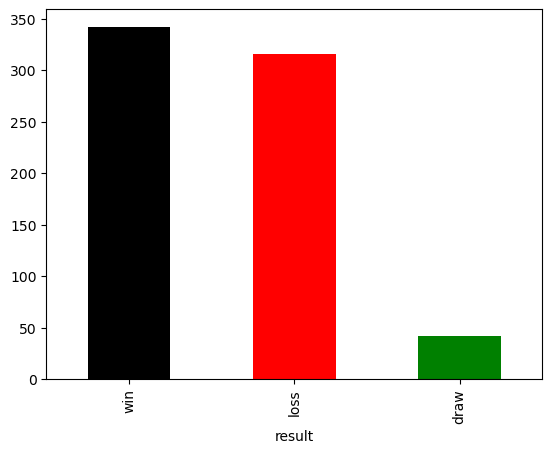

In [58]:
df.result.value_counts().plot(kind='bar', color = ['k','r','g'])

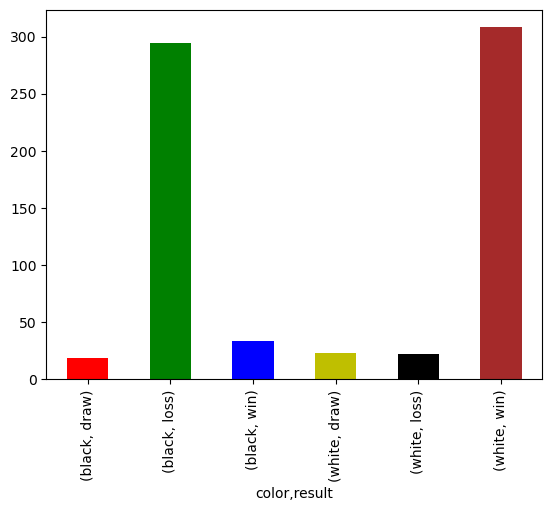

In [62]:
winning_color = df.groupby(['color', 'result']).size().plot(kind='bar', color = ['r','g','b','y','k','brown'])

In [60]:
winning_color

color  result
black  draw       19
       loss      294
       win        34
white  draw       23
       loss       22
       win       308
dtype: int64

In [70]:
re.findall(r'https://www.chess.com/openings/([A-Za-z-]+)',df.iloc[0,:].eco)

['Four-Knights-Game-Scotch-Variation-Accepted-']

In [71]:
# analyze openings
df['openings'] = df.eco.str.extract(r'https://www.chess.com/openings/([A-Za-z-]+)')

In [95]:
df['openings'] = df['openings'].apply(lambda row : row.strip('-')) # strip the trailing -

In [96]:
df.head(2)

,url,pgn,time_control,end_time,rated,tcn,uuid,initial_setup,fen,start_time,...,white,black,eco,accuracies,white_user,black_user,color,raw_result,result,openings
0,https://www.chess.com/game/daily/175903249,"[Event ""Play vs Bot""]\n[Site ""Chess.com""]\n[Da...",1/0,1730501016,False,mC0Kgv5QlBKBvB!Tbs9zBQXQdm8!CK98cuzsjs8KowTJfo...,bb592aee-98a2-11ef-b248-1724ad6b12c6,rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w ...,8/8/2p5/8/8/2k5/8/r1K4b w - - 28 67,1.730499e+09,...,"{'rating': 2725, 'result': 'checkmated', '@id'...","{'rating': 2769, 'result': 'win', '@id': 'http...",https://www.chess.com/openings/Four-Knights-Ga...,NaN,capablanca-BOT,Hikaru,black,0-1,loss,Four-Knights-Game-Scotch-Variation-Accepted
1,https://www.chess.com/game/live/124302530065,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",60,1730563543,True,jr0KcjZRmu5Qgv!TlBKBvB90fm8!eg6ZkA98mv09bs45BQ...,067a6bf4-9934-11ef-9df8-6cfe544c0428,,8/5pbk/3p1p2/2p2P1P/2P1q1K1/6P1/8/7q w - -,NaN,...,"{'rating': 3248, 'result': 'checkmated', '@id'...","{'rating': 2565, 'result': 'win', '@id': 'http...",https://www.chess.com/openings/Nimzowitsch-Lar...,"{'white': 78.48, 'black': 83.29}",Hikaru,meoluoi91,white,0-1,loss,Nimzowitsch-Larsen-Attack-Modern-Variation


In [97]:
opening_counts = df.groupby(['openings', 'color']).size().unstack(fill_value=0)

In [98]:
opening_counts

color,black,white
openings,,
Alapin-Sicilian-Defense,0,2
Alapin-Sicilian-Defense-Barmen-Defense,2,2
Alekhines-Defense-Exchange-Variation,1,0
Alekhines-Defense-Maroczy-Variation,1,0
Alekhines-Defense-Modern-Larsen-Variation,0,1
...,...,...
Vienna-Game-Main-Line,0,1
Vienna-Game-Main-Line-Breyer-Variation,0,1
Vienna-Game-Main-Line-Paulsen-Attack,0,1


In [99]:
top_openings = opening_counts.sum(axis=1).nlargest(5).index

In [100]:
top_openings

Index(['Nimzowitsch-Larsen-Attack-Classical-Variation',
       'Nimzowitsch-Larsen-Attack-Modern-Variation', 'Modern-Defense-with',
       'Modern-Defense-Standard-Line',
       'Closed-Sicilian-Defense-Grand-Prix-Attack'],
      dtype='object', name='openings')

In [101]:
top_opening_counts = opening_counts.loc[top_openings]

<Axes: ylabel='openings'>

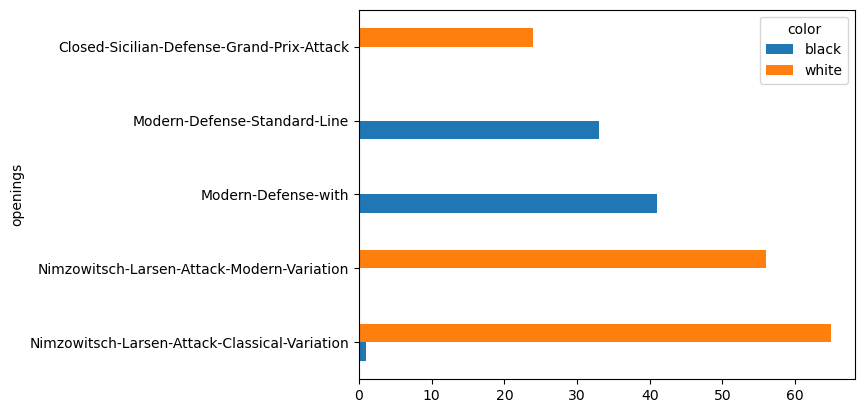

In [102]:
top_opening_counts.plot(kind='barh')